In [2]:
# Step 1: Imports and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Column names from UCI
cols = ["class","cap-shape","cap-surface","cap-color","bruises","odor",
        "gill-attachment","gill-spacing","gill-size","gill-color",
        "stalk-shape","stalk-root","stalk-surface-above-ring",
        "stalk-surface-below-ring","stalk-color-above-ring",
        "stalk-color-below-ring","veil-type","veil-color","ring-number",
        "ring-type","spore-print-color","population","habitat"]

df = pd.read_csv("/content/agaricus-lepiota.data", names=cols)

df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# Step 2: Basic structure and target distribution
print("Shape:", df.shape)
print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isna().sum())

print("\nClass distribution:")
print(df['class'].value_counts())


Shape: (8124, 23)

Data types:
class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Missing values per column:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
br

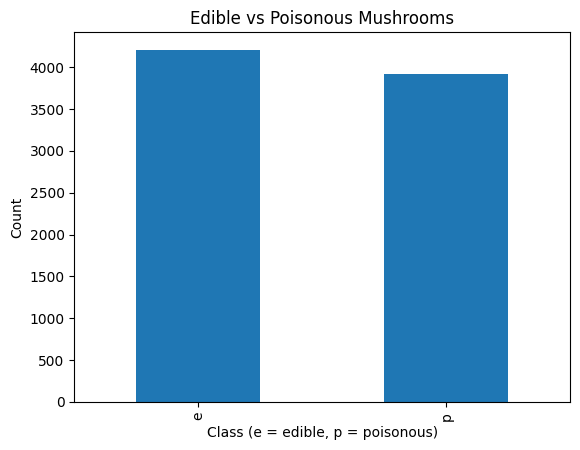

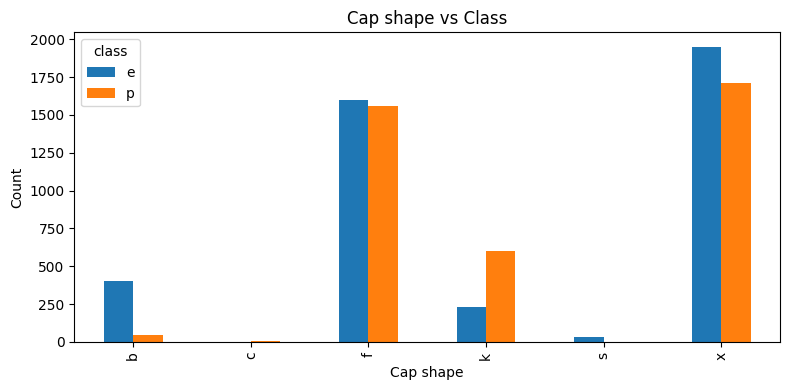

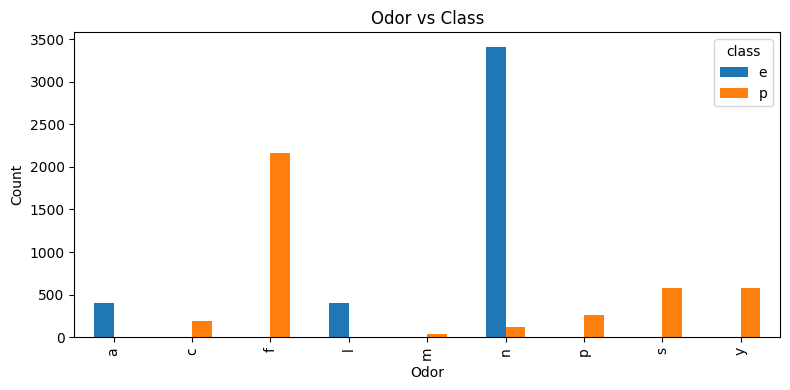

In [4]:
import matplotlib.pyplot as plt

# Target balance
df['class'].value_counts().plot(kind='bar')
plt.title('Edible vs Poisonous Mushrooms')
plt.xlabel('Class (e = edible, p = poisonous)')
plt.ylabel('Count')
plt.show()

# cap-shape vs class
pd.crosstab(df['cap-shape'], df['class']).plot(kind='bar', figsize=(8,4))
plt.title('Cap shape vs Class')
plt.xlabel('Cap shape')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#  odor vs class
pd.crosstab(df['odor'], df['class']).plot(kind='bar', figsize=(8,4))
plt.title('Odor vs Class')
plt.xlabel('Odor')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [5]:
from sklearn.preprocessing import LabelEncoder

# separate category instead of missing
df = df.replace('?', 'missing')

#  encode each column
encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((6499, 22), (1625, 22))

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

def evaluate_model(model, X_train, X_test, y_train, y_test, name="Model"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    return model, y_pred, cm


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
nb = GaussianNB()

dt, dt_pred, dt_cm = evaluate_model(dt, X_train, X_test, y_train, y_test, "Decision Tree")
rf, rf_pred, rf_cm = evaluate_model(rf, X_train, X_test, y_train, y_test, "Random Forest")
nb, nb_pred, nb_cm = evaluate_model(nb, X_train, X_test, y_train, y_test, "Naive Bayes")



Decision Tree Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
 [[842   0]
 [  0 783]]

Random Forest Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
 [[842   0]
 [  0 783]]

Naive Bayes Accuracy: 0.9255

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92     

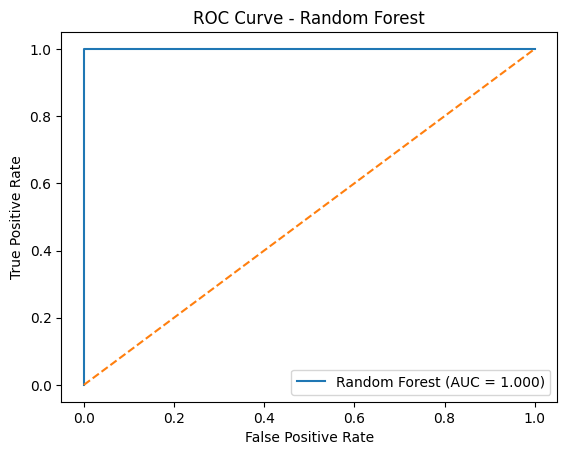

In [9]:
# ROC curve for Random Forest
y_proba_rf = rf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.3f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


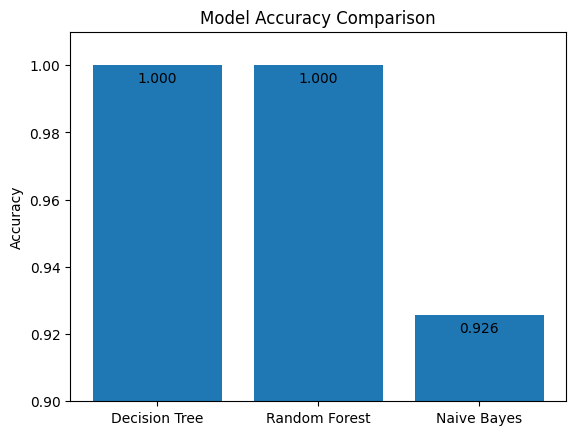

In [10]:
dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
nb_acc = accuracy_score(y_test, nb_pred)

models = ['Decision Tree', 'Random Forest', 'Naive Bayes']
scores = [dt_acc, rf_acc, nb_acc]

plt.bar(models, scores)
plt.ylim(0.9, 1.01)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
for i,v in enumerate(scores):
    plt.text(i, v-0.005, f"{v:.3f}", ha='center')
plt.show()


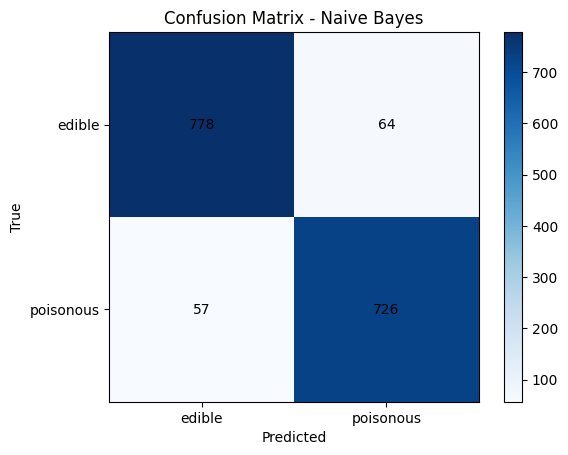

In [11]:
import numpy as np

cm = nb_cm  # confusion matrix

fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_xticks([0,1]); ax.set_yticks([0,1])
ax.set_xticklabels(['edible','poisonous'])
ax.set_yticklabels(['edible','poisonous'])
plt.title('Confusion Matrix - Naive Bayes')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center')

plt.colorbar(im)
plt.show()
